In [1]:
import pandas as pd 
import numpy as np

In [6]:
movies_df = pd.read_csv('../data/raw/movies.csv')
ratings_df = pd.read_csv('../data/raw/ratings.csv')

In [7]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
def analyze_dataframe(df, name):
    """Prints comprehensive information for a given DataFrame."""
    print(f"## 📊 Analysis for DataFrame: **{name}**")
    print("-" * 50)

    # --- 1. General Information (Infos) ---
    print("\n### ℹ️ General Info")
    df.info(verbose=False, memory_usage="deep")

    # --- 2. Descriptive Statistics (Description) ---
    print("\n### 📈 Descriptive Statistics")
    print(df.describe(include='all').to_markdown(numalign="left", stralign="left"))

    print("\n### 📈 infos Statistics")
    print(df.info())
    # --- 3. Missing/Null Values ---
    print("\n### 🚫 Missing Values (Nulls)")
    null_counts = df.isnull().sum()
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    null_df = pd.DataFrame({
        'Null Count': null_counts,
        'Percentage': null_percentages.astype(str) + '%'
    }).sort_values(by='Null Count', ascending=False)

    print(null_df[null_df['Null Count'] > 0].to_markdown(numalign="left", stralign="left"))

    # --- 4. fully Duplicated rows---
    print("\n### 👯 Duplicate Rows")
    total_duplicates = df.duplicated().sum()
    print(f"Total fully duplicated rows found: **{total_duplicates}**")

    if total_duplicates > 0:
        print("\nNote: Consider using `df.drop_duplicates(inplace=True)` to remove them.")

    print("\n" + "=" * 50 + "\n")

In [13]:
analyze_dataframe(movies_df, "Movies DataFrame")


## 📊 Analysis for DataFrame: **Movies DataFrame**
--------------------------------------------------

### ℹ️ General Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Columns: 3 entries, movieId to genres
dtypes: int64(1), object(2)
memory usage: 1.4 MB

### 📈 Descriptive Statistics
|        | movieId   | title           | genres   |
|:-------|:----------|:----------------|:---------|
| count  | 9742      | 9742            | 9742     |
| unique | nan       | 9737            | 951      |
| top    | nan       | Saturn 3 (1980) | Drama    |
| freq   | nan       | 2               | 1053     |
| mean   | 42200.4   | nan             | nan      |
| std    | 52160.5   | nan             | nan      |
| min    | 1         | nan             | nan      |
| 25%    | 3248.25   | nan             | nan      |
| 50%    | 7300      | nan             | nan      |
| 75%    | 76232     | nan             | nan      |
| max    | 193609    | nan             | nan      |

### 📈 info

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [15]:
analyze_dataframe(ratings_df, "Ratings DataFrame")

## 📊 Analysis for DataFrame: **Ratings DataFrame**
--------------------------------------------------

### ℹ️ General Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Columns: 4 entries, userId to timestamp
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

### 📈 Descriptive Statistics
|       | userId   | movieId   | rating   | timestamp   |
|:------|:---------|:----------|:---------|:------------|
| count | 100836   | 100836    | 100836   | 100836      |
| mean  | 326.128  | 19435.3   | 3.50156  | 1.20595e+09 |
| std   | 182.618  | 35531     | 1.04253  | 2.16261e+08 |
| min   | 1        | 1         | 0.5      | 8.28125e+08 |
| 25%   | 177      | 1199      | 3        | 1.01912e+09 |
| 50%   | 325      | 2991      | 3.5      | 1.18609e+09 |
| 75%   | 477      | 8122      | 4        | 1.43599e+09 |
| max   | 610      | 193609    | 5        | 1.5378e+09  |

### 📈 infos Statistics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 1008

In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
unique_movie_ids_in_ratings = set(ratings_df['movieId'].unique())
unique_movie_ids_in_movies = set(movies_df['movieId'].unique())

non_existing_movie_ids = list(unique_movie_ids_in_ratings - unique_movie_ids_in_movies)

num_non_existing_movies = len(non_existing_movie_ids)
total_unique_movies_in_ratings = len(unique_movie_ids_in_ratings)

if total_unique_movies_in_ratings > 0:
    ratio_non_existing_movies = (num_non_existing_movies / total_unique_movies_in_ratings) * 100
else:
    ratio_non_existing_movies = 0

print("### Movies in ratings_df but not in movies_df ###")
print(f"Number of non-existing movie IDs: {num_non_existing_movies}")
print(f"Ratio of non-existing movie IDs: {ratio_non_existing_movies:.2f}%")

if num_non_existing_movies > 0:
    print("\nList of non-existing movie IDs (up to 20):")
    for movie_id in non_existing_movie_ids[:20]:
        print(f"- {movie_id}")
else:
    print("\nAll movie IDs in ratings_df exist in movies_df.")

### Movies in ratings_df but not in movies_df ###
Number of non-existing movie IDs: 0
Ratio of non-existing movie IDs: 0.00%

All movie IDs in ratings_df exist in movies_df.


In [20]:
duplicate_titles = movies_df['title'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1].index

movies_with_duplicate_titles = movies_df[movies_df['title'].isin(duplicate_titles)]
print(movies_with_duplicate_titles)

      movieId                                   title  \
650       838                             Emma (1996)   
2141     2851                         Saturn 3 (1980)   
4169     6003  Confessions of a Dangerous Mind (2002)   
5601    26958                             Emma (1996)   
5854    32600                             Eros (2004)   
5931    34048                War of the Worlds (2005)   
6932    64997                War of the Worlds (2005)   
9106   144606  Confessions of a Dangerous Mind (2002)   
9135   147002                             Eros (2004)   
9468   168358                         Saturn 3 (1980)   

                                   genres  
650                  Comedy|Drama|Romance  
2141            Adventure|Sci-Fi|Thriller  
4169          Comedy|Crime|Drama|Thriller  
5601                              Romance  
5854                                Drama  
5931     Action|Adventure|Sci-Fi|Thriller  
6932                        Action|Sci-Fi  
9106  Comedy|Crime|D

In [21]:
genres_count = movies_df['genres'].str.split('|').explode().value_counts()
print(genres_count)

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [22]:
print(movies_df[movies_df['genres']=="(no genres listed)"])

      movieId                                              title  \
8517   114335                                  La cravate (1957)   
8684   122888                                     Ben-hur (2016)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8782   129250                                  Superfast! (2015)   
8836   132084                                Let It Be Me (1995)   
8902   134861               Trevor Noah: African American (2013)   
9033   141131                                   Guardians (2016)   
9053   141866                                  Green Room (2015)   
9070   142456                     The Brand New Testament (2015)   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9178   149330                          A Cosmic Christmas (1977)   
9217   152037                                 Grease Live (2016)   
9248   155589                             Noin 7

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genre_distribution(df):
    """
    Plots the distribution of genres based on binary columns.
    """
    # 1. Identify columns to drop (Non-Genre columns)
    # We remove ID, Title, the original string 'genres', and the numerical 'avg_rating'
    cols_to_drop = ['movieId', 'title', 'genres', 'avg_rating']
    
    # 2. Sum the remaining columns (The Genre Columns)
    # This creates a Series where Index = Genre Name, Value = Count
    genre_counts = df.drop(columns=cols_to_drop, errors='ignore').sum().sort_values(ascending=False)
    
    # 3. Create the Visualization
    plt.figure(figsize=(14, 8))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
    
    # 4. Add Labels
    plt.title('Distribution of Movie Genres', fontsize=16)
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    
    # Add text labels to the end of each bar for clarity
    for index, value in enumerate(genre_counts.values):
        plt.text(value + 5, index, str(value), va='center')

    plt.tight_layout()
    plt.show()



NameError: name 'df_final' is not defined

In [24]:
df_expNLTK = pd.read_csv('../data/processed/clean_dataset_expNLTK.csv')
df_expAPI = pd.read_csv('../data/processed/clean_dataset_expAPI.csv')
df_del = pd.read_csv('../data/processed/clean_dataset_expDELETE.csv')   

C:\Users\maata\AppData\Local\Temp\ipykernel_14612\2406415707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


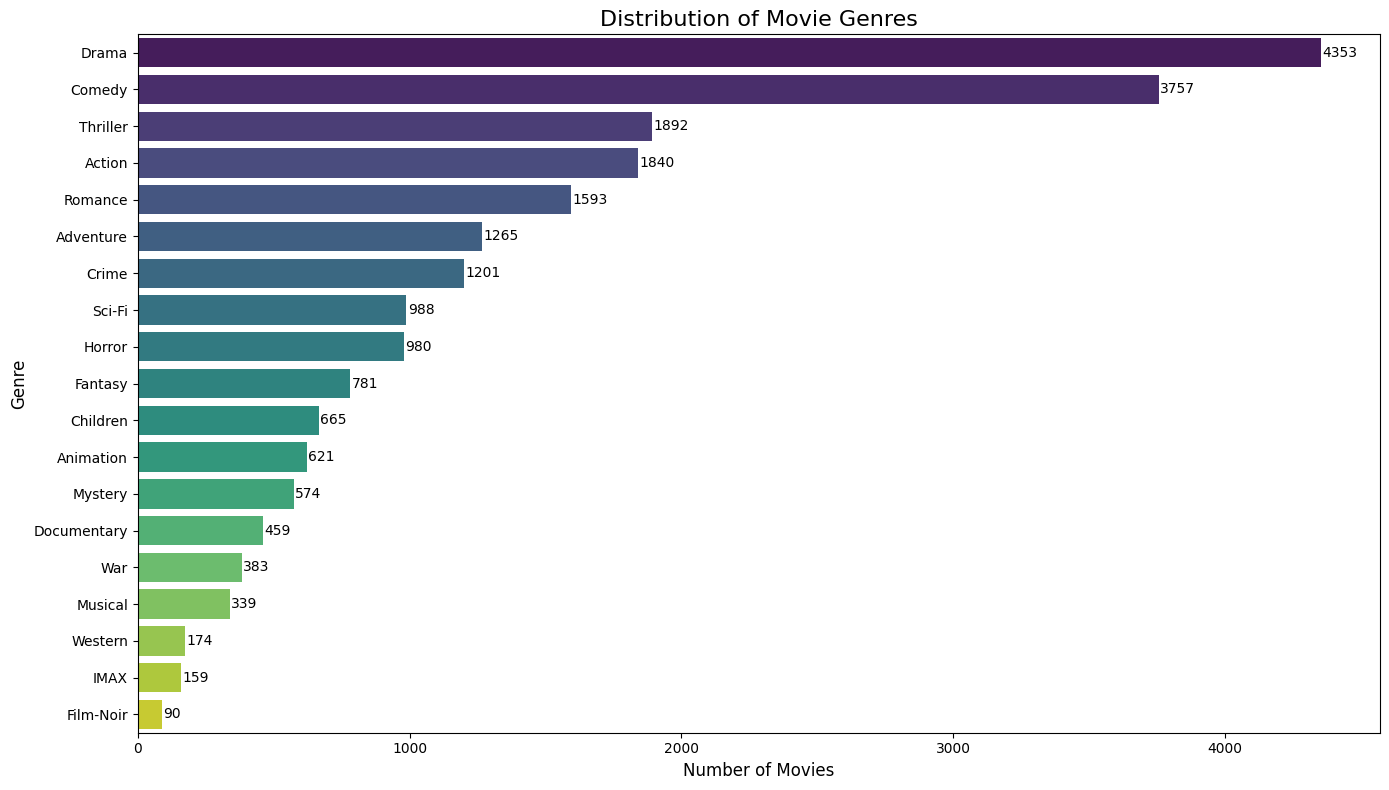

In [26]:
plot_genre_distribution(df_expNLTK)


C:\Users\maata\AppData\Local\Temp\ipykernel_14612\2406415707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


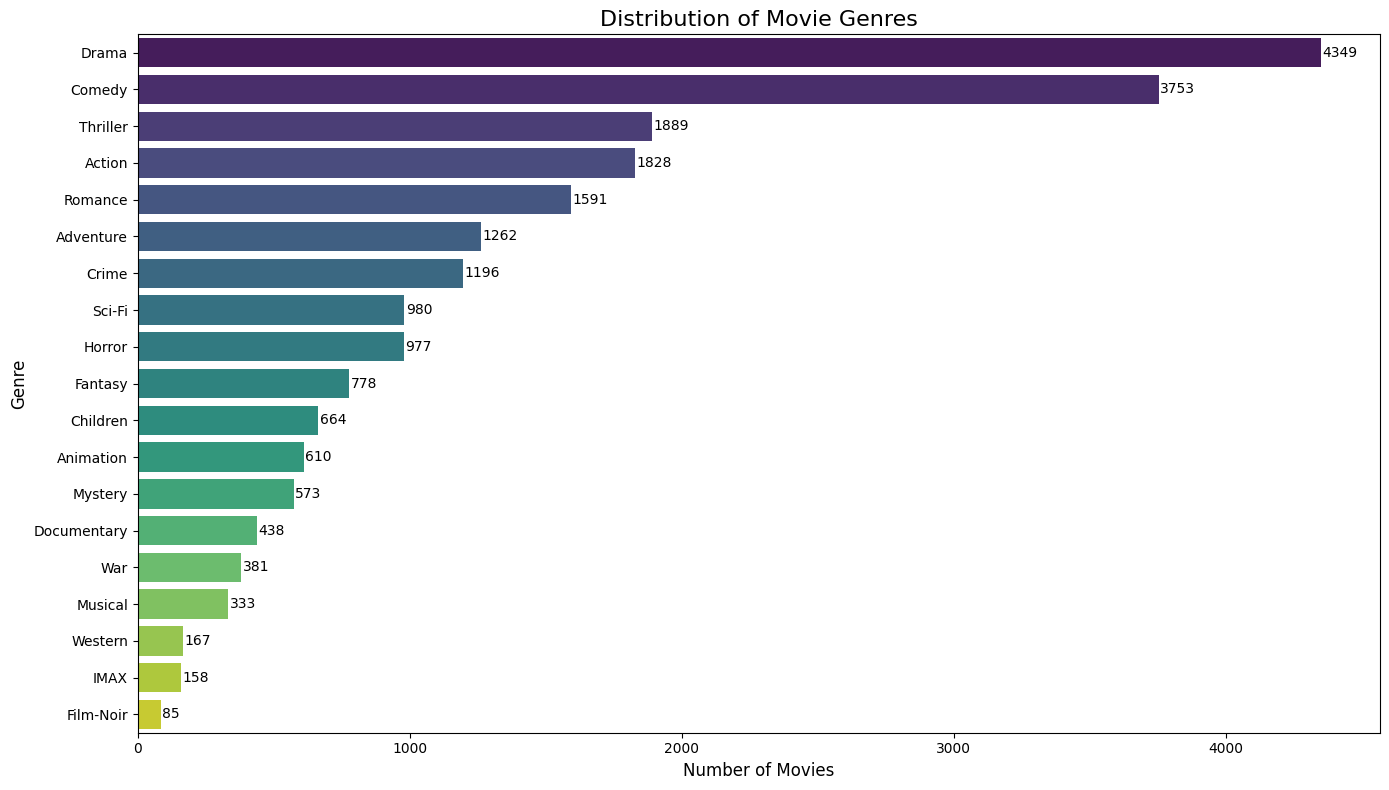

In [27]:
plot_genre_distribution(df_del)

C:\Users\maata\AppData\Local\Temp\ipykernel_14612\2406415707.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


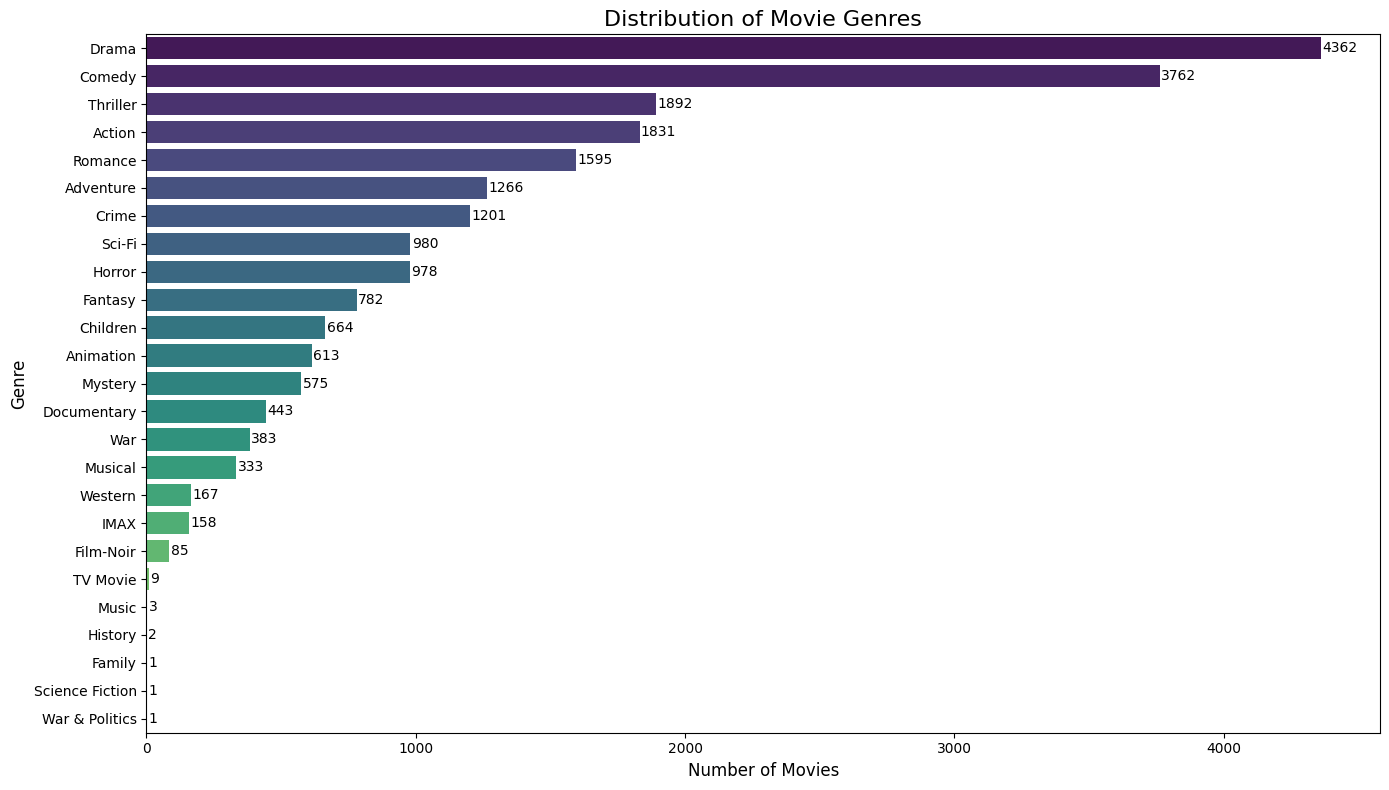

In [28]:
plot_genre_distribution(df_expAPI)  



Top 5 Rated Movies:
                                 title                  genres  avg_rating
9693  Won't You Be My Neighbor? (2018)             Documentary         5.0
4667                  Jane Eyre (1944)           Drama|Romance         5.0
3802                       Rain (2001)           Drama|Romance         5.0
7927            Goodbye Charlie (1964)  Comedy|Fantasy|Romance         5.0
2934    Sorority House Massacre (1986)                  Horror         5.0


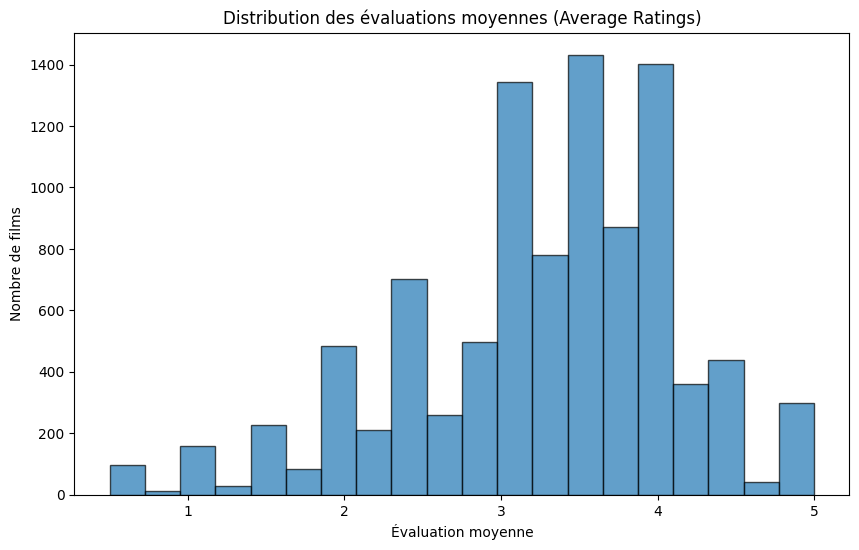

In [31]:
top_5_movies = df_expNLTK.sort_values(by='avg_rating', ascending=False).head(5)
print("\nTop 5 Rated Movies:")
print(top_5_movies[['title', 'genres', 'avg_rating']])

# Créer un graphique en barres (Distribution des évaluations)
plt.figure(figsize=(10, 6))
plt.hist(df_expNLTK['avg_rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution des évaluations moyennes (Average Ratings)')
plt.xlabel('Évaluation moyenne')
plt.ylabel('Nombre de films')
plt.show()

C:\Users\maata\AppData\Local\Temp\ipykernel_14612\1878934933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


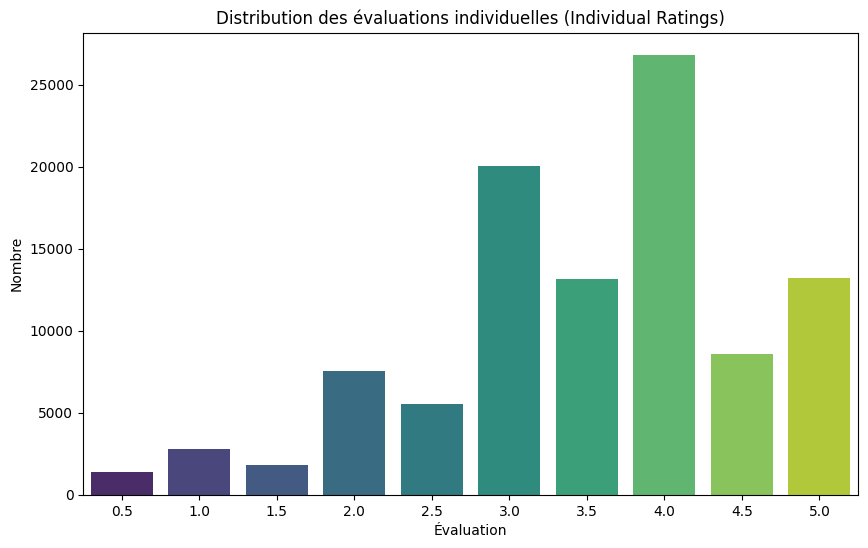

In [32]:
# For individual ratings distribution (discrete values)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution des évaluations individuelles (Individual Ratings)')
plt.xlabel('Évaluation')
plt.ylabel('Nombre')
plt.show()


Top 5 Rated Movies:
                                             title                     genres  \
48                                 Lamerica (1994)            Adventure|Drama   
7222                               Meantime (1984)               Comedy|Drama   
8915      Scooby-Doo! and the Samurai Sword (2009)  Animation|Children|Comedy   
8916  Scooby-Doo! and the Loch Ness Monster (2004)  Animation|Children|Comedy   
8917                    Big Top Scooby-Doo! (2012)  Animation|Children|Comedy   

      avg_rating  
48           5.0  
7222         5.0  
8915         5.0  
8916         5.0  
8917         5.0  


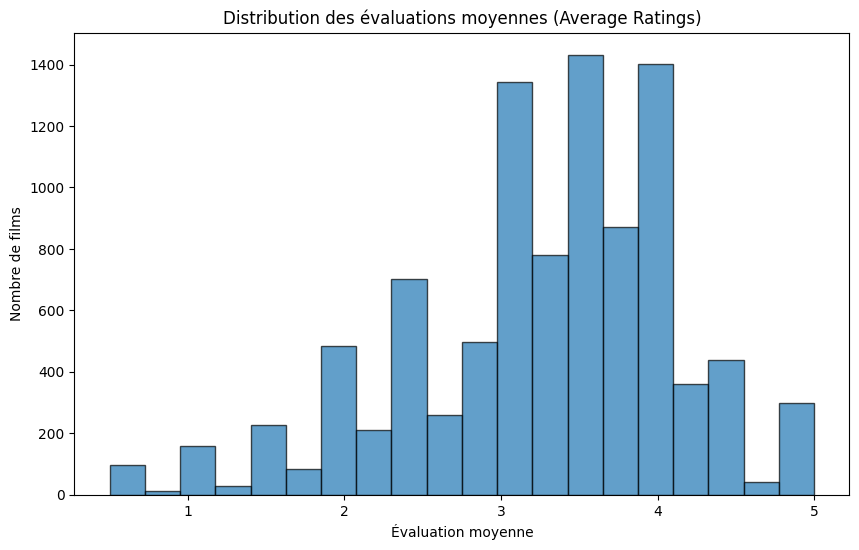

In [34]:
top_5_movies = df_expAPI.sort_values(by='avg_rating', ascending=False).head(5)
print("\nTop 5 Rated Movies:")
print(top_5_movies[['title', 'genres', 'avg_rating']])

# Créer un graphique en barres (Distribution des évaluations)
plt.figure(figsize=(10, 6))
plt.hist(df_expAPI['avg_rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution des évaluations moyennes (Average Ratings)')
plt.xlabel('Évaluation moyenne')
plt.ylabel('Nombre de films')
plt.show()


Top 5 Rated Movies:
                                                  title  \
9659                   Won't You Be My Neighbor? (2018)   
9103                      Cosmic Scrat-tastrophe (2015)   
9109                                   The Girls (1961)   
9111  The Adventures of Sherlock Holmes and Doctor W...   
9112  Adventures Of Sherlock Holmes And Dr. Watson: ...   

                         genres  avg_rating  
9659                Documentary         5.0  
9103  Animation|Children|Comedy         5.0  
9109             Comedy|Romance         5.0  
9111              Crime|Mystery         5.0  
9112              Crime|Mystery         5.0  


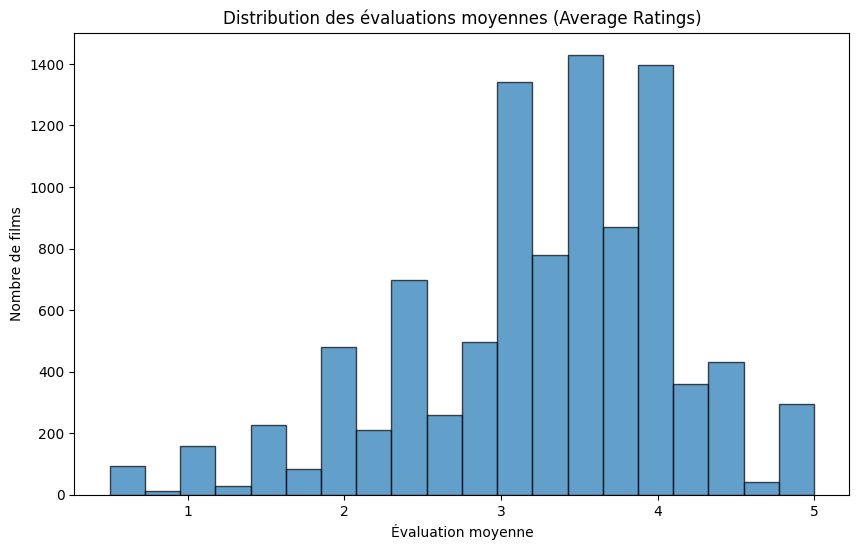

In [35]:
top_5_movies = df_del.sort_values(by='avg_rating', ascending=False).head(5)
print("\nTop 5 Rated Movies:")
print(top_5_movies[['title', 'genres', 'avg_rating']])

# Créer un graphique en barres (Distribution des évaluations)
plt.figure(figsize=(10, 6))
plt.hist(df_del['avg_rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution des évaluations moyennes (Average Ratings)')
plt.xlabel('Évaluation moyenne')
plt.ylabel('Nombre de films')
plt.show()

In [36]:
df_expAPI

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Science Fiction,TV Movie,Thriller,War,War & Politics,Western,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
9719,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.500000
9720,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.500000
9721,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.500000
